### Analysis of varied parameters of earthquakes and their relationship to the occurence of tsunami waves.

### 1. Data preparation

In [13]:
# third party libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data from the csv file
data = pd.read_csv('data/earthquakes/quakes.csv')

# rename the columns to more readable names
data.rename(columns={
  "parsed_place": "country",
  "mag": "magnitude",
  "magType": "magnitude_type",
  "place": "place"
}, inplace=True)

# convert the columns to appropriate data types
data.tsunami = data.tsunami.astype(bool)
data.time = pd.to_datetime(data.time, unit='ms', origin = 'unix')

### 2. Exploratory data analysis

In [9]:
data.head()

,magnitude,magnitude_type,time,place,tsunami,country
0,1.35,ml,2018-10-13 23:59:28.010,"9km NE of Aguanga, CA",False,California
1,1.29,ml,2018-10-13 23:58:49.610,"9km NE of Aguanga, CA",False,California
2,3.42,ml,2018-10-13 23:57:42.610,"8km NE of Aguanga, CA",False,California
3,0.44,ml,2018-10-13 23:56:18.070,"9km NE of Aguanga, CA",False,California
4,2.16,md,2018-10-13 23:51:56.050,"10km NW of Avenal, CA",False,California


In [11]:
data.describe()

,magnitude,time
count,9331.000000,9332
mean,1.497345,2018-09-30 05:01:18.187634432
min,-1.260000,2018-09-18 00:01:04.470000
25%,0.720000,2018-09-24 12:35:48.580750080
50%,1.300000,2018-09-29 18:18:24.948499968
75%,1.900000,2018-10-05 18:55:20.702999808
max,7.500000,2018-10-13 23:59:28.010000
std,1.203347,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   magnitude       9331 non-null   float64       
 1   magnitude_type  9331 non-null   object        
 2   time            9332 non-null   datetime64[ns]
 3   place           9332 non-null   object        
 4   tsunami         9332 non-null   bool          
 5   country         9332 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 373.8+ KB


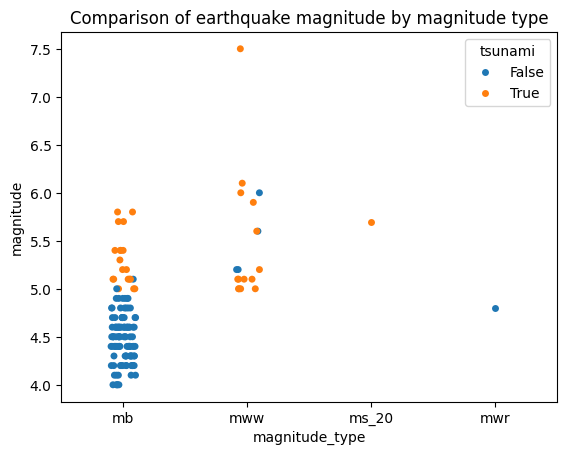

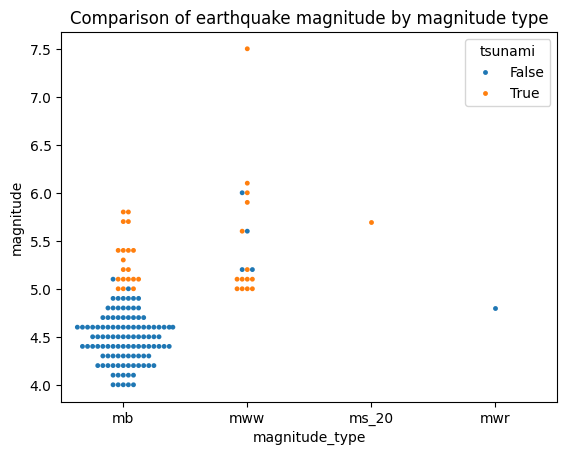

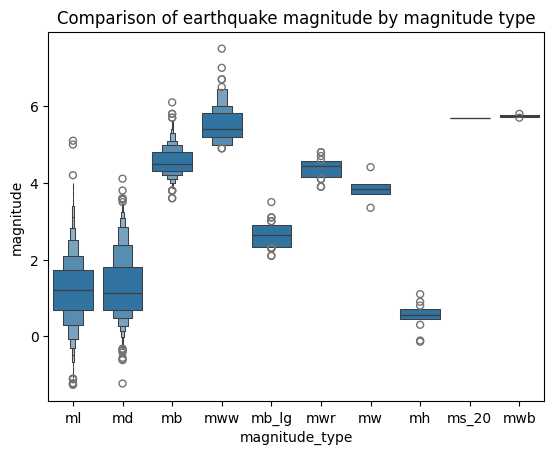

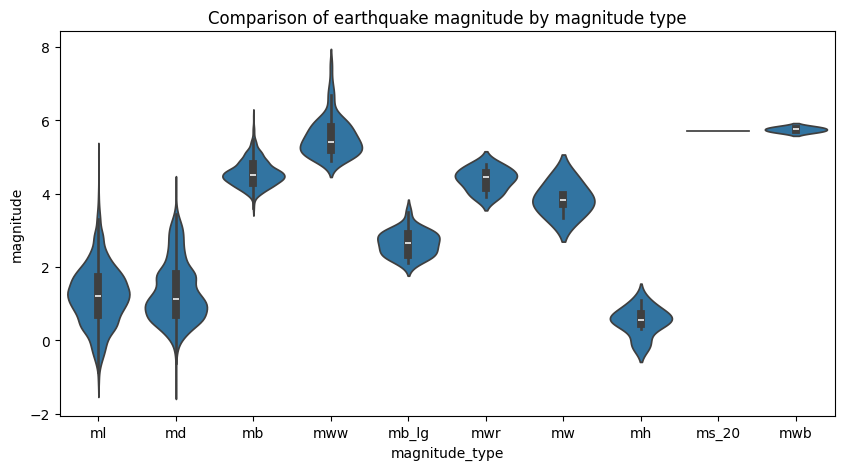

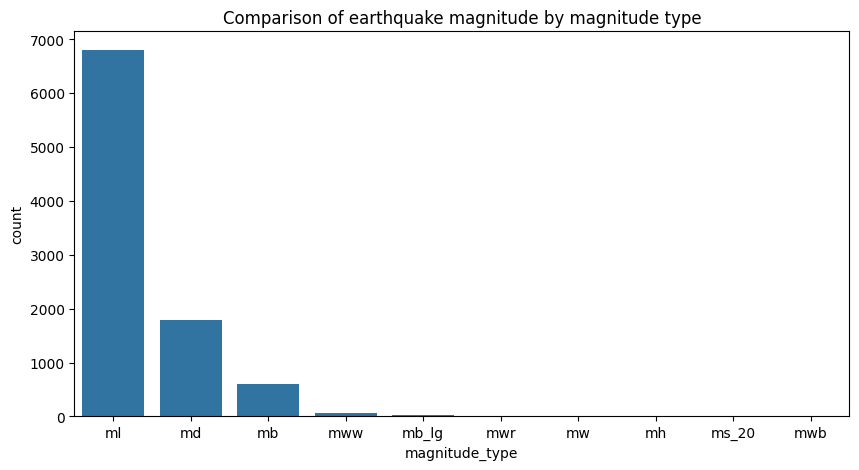

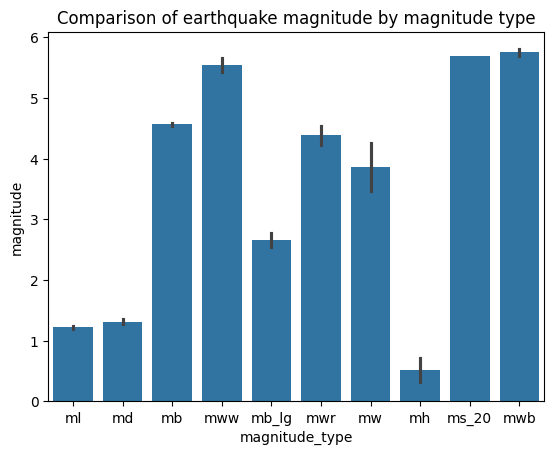

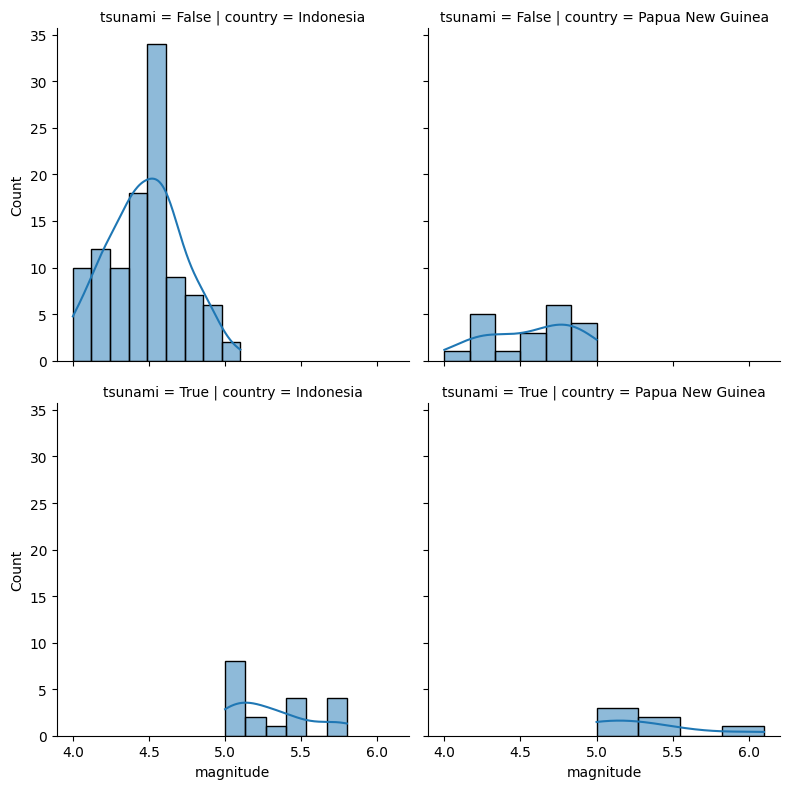

In [5]:
# create strip plot to understand the magnitude types,
# the range of magnitudes, and their relationship to 
# the occurence of tsunami waves
sns.stripplot(
  x='magnitude_type',
  y='magnitude', 
  hue='tsunami',
  data=data.query('country == "Indonesia"')
)

show_plot('Comparison of earthquake magnitude by magnitude type')

# use the swarmplot to reduce overlaping 
# of the points observed in the strip plot
sns.swarmplot(
  x='magnitude_type',
  y='magnitude', 
  hue='tsunami',
  data=data.query('country == "Indonesia"'),
  size=3.5 # point size
)
show_plot('Comparison of earthquake magnitude by magnitude type')


# create an enhanced boxplot to understand 
# the quantile fractions of the earthquake 
# magnitudes for different magnitude types
sns.boxenplot(
  x='magnitude_type',
  y='magnitude', 
  data=data[['magnitude_type', 'magnitude']],
)
show_plot('Comparison of earthquake magnitude by magnitude type')

# create a violin plot to understand the distribution
# of the earthquake magnitudes by the magnitude type
# by comnining a kernel density estimate and a box plot
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
  x='magnitude_type',
  y='magnitude', 
  data=data[['magnitude_type', 'magnitude']],
  ax=axes,
  density_norm='width' #all violins will have the same width
)
show_plot('Comparison of earthquake magnitude by magnitude type')

# alternatively, we can use countplot or barplot to
# visualize the frequency of occurence of each magnitude

# countplot
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(
  x='magnitude_type',
  data=data[['magnitude_type']],
  ax=axes
)
show_plot('Comparison of earthquake magnitude by magnitude type')

# barplot to show the average magnitude of each magnitude 
# type and the variance in the magnitude values
sns.barplot(
  x='magnitude_type',
  y='magnitude', 
  data=data[['magnitude_type', 'magnitude']],
)
show_plot('Comparison of earthquake magnitude by magnitude type')

# analyze the earthquakes in Indonesia and Papua New Guinea
facet_grid = sns.FacetGrid(
  data.query(
    'country.isin('
    '["Indonesia", "Papua New Guinea"]'
    ') and magnitude_type == "mb"'),
  row='tsunami',
  col='country',
  height=4
)

facet_grid.map(sns.histplot, 'magnitude', kde=True)
show_plot()